https://mp.weixin.qq.com/s/LGwFqIJlq65bf_A6VO6E5Q  
### 目标
学会：  
访问像素值并修改它们  
访问图像属性  
设置感兴趣区域(ROI)  
分割和合并图像  
本节中的几乎所有操作都主要与Numpy相关，而不是与OpenCV相关。要使用OpenCV编写更好的优化代码，需要Numpy的丰富知识。  
（由于大多数示例都是单行代码，因此示例将在Python终端中显示）  
### 访问和修改像素值  
让我们先加载彩色图像：  

In [ ]:
import numpy as np
import cv2 as cv

In [ ]:
img = cv.imread('01.jpg')

可以通过行和列坐标来访问像素值。对于 BGR 图像，它返回一个由蓝色、绿色和红色值组成的数组。对于灰度图像，只返回相应的灰度。

In [ ]:
px = img[100,100]
print( px )

In [ ]:
# 仅访问蓝色像素
blue = img[100,100,0]
print( blue )

你可以用相同的方式修改像素值。

In [ ]:
img[100,100] = [255,255,255]
print( img[100,100] )

警告：  
Numpy是用于快速数组计算的优化库。因此，简单地访问每个像素值并对其进行修改将非常缓慢，因此不建议使用。  
注意：  
上面的方法通常用于选择数组的区域，例如前5行和后3列。对于单个像素访问，Numpy数组方法array.item()和array.itemset())被认为更好，但是它们始终返回标量。如果要访问所有B，G，R值，则需要分别调用所有的array.item()。

更好的像素访问和编辑方法：

In [ ]:
# 访问 RED 值
img.item(10,10,2)

In [ ]:
# 修改 RED 值
img.itemset((10,10,2),100)
img.item(10,10,2)

注意：  
如果图像是灰度的，则返回的元组仅包含行数和列数，因此这是检查加载的图像是灰度还是彩色的好方法。

In [ ]:
#像素总数可通过访问img.size：
print( img.size )
#图像数据类型通过img.dtype获得：
print( img.dtype )

注意：  
img.dtype在调试时非常重要，因为OpenCV-Python代码中的大量错误是由无效的数据类型引起的。

### 图像感兴趣区域ROI
有时候，你不得不处理一些特定区域的图像。对于图像中的眼睛检测，首先对整个图像进行人脸检测。在获取人脸图像时，我们只选择人脸区域，搜索其中的眼睛，而不是搜索整个图像。它提高了准确性(因为眼睛总是在面部上:D )和性能(因为我们搜索的区域很小)。  
使用Numpy索引再次获得ROI。在这里，我要选择球并将其复制到图像中的另一个区域：

In [ ]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball 

### 拆分和合并图像通道
有时你需要分别处理图像的B，G，R通道。在这种情况下，你需要将BGR图像拆分为单个通道。在其他情况下，你可能需要将这些单独的频道加入BGR图片。你可以通过以下方式简单地做到这一点：

In [ ]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))

假设你要将所有红色像素都设置为零，则无需先拆分通道。numpy索引更快：

In [ ]:
img [:, :, 2] = 0

警告：  
cv.split()是一项耗时的操作（就时间而言）。因此，仅在必要时才这样做。否则请进行Numpy索引。

### 为图像设置边框（填充）
如果要在图像周围创建边框（如相框），则可以使用cv.copyMakeBorder()。但是它在卷积运算，零填充等方面有更多应用。此函数采用以下参数：  
src - 输入图像  
top，bottom，left，right 边界宽度（以相应方向上的像素数为单位）  
borderType - 定义要添加哪种边框的标志。它可以是以下类型：  
cv.BORDER_CONSTANT - 添加恒定的彩色边框。该值应作为下一个参数给出。  
cv.BORDER_REFLECT - 边框将是边框元素的镜像，如下所示： fedcba | abcdefgh | hgfedcb  
cv.BORDER_REFLECT_101或 cv.BORDER_DEFAULT与上述相同，但略有变化，例如： gfedcb | abcdefgh | gfedcba  
cv.BORDER_REPLICATE最后一个元素被复制，像这样： aaaaaa | abcdefgh | hhhhhhh  
cv.BORDER_WRAP难以解释，它看起来像这样： cdefgh | abcdefgh | abcdefg  
value -边框的颜色，如果边框类型为cv.BORDER_CONSTANT  
下面是一个示例代码，演示了所有这些边框类型，以便更好地理解：  

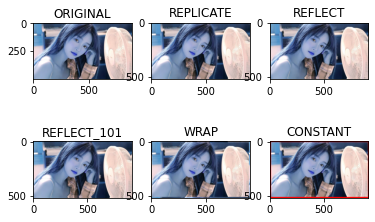

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img1 = cv.imread('01.jpg')
replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()